# Detecção de Contornos em Imagens de LEGO

Este notebook demonstra como detectar contornos em imagens de peças de LEGO utilizando técnicas de processamento de imagem com OpenCV.

## Objetivo
- Carregar imagens da pasta 'lego'
- Aplicar técnicas de detecção de contornos
- Visualizar os resultados comparando imagens originais com os contornos detectados

## 1. Importar Bibliotecas Necessárias

In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
from pathlib import Path

# Configurar matplotlib para exibir imagens corretamente
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = False

print("Bibliotecas importadas com sucesso!")
print(f"OpenCV versão: {cv2.__version__}")

Bibliotecas importadas com sucesso!
OpenCV versão: 4.11.0


## 2. Carregar Imagens da Pasta

Vamos listar e carregar as imagens da pasta 'lego' para processamento.

In [14]:
# Definir o caminho da pasta com as imagens
image_folder = 'lego'
base_path = Path.cwd()
full_path = base_path / image_folder

print(f"Procurando imagens em: {full_path}")

# Listar todos os arquivos de imagem na pasta
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
image_files = []

if full_path.exists():
    for file in full_path.iterdir():
        if file.suffix.lower() in image_extensions:
            image_files.append(file)
    
    print(f"Encontradas {len(image_files)} imagens na pasta")
    
    # Mostrar os primeiros 10 arquivos encontrados
    print("\nPrimeiras imagens encontradas:")
    for i, file in enumerate(image_files[:10]):
        print(f"{i+1}. {file.name}")
else:
    print(f"Pasta {full_path} não encontrada!")
    image_files = []

Procurando imagens em: c:\Users\Matheus\Deffect-detection\lego
Encontradas 123 imagens na pasta

Primeiras imagens encontradas:
1. adsyjmgvp.jpg
2. agmpdjsyv.jpg
3. ajgyvdsmp.jpg
4. ajsdmvypg.jpg
5. apmjvdgys.jpg
6. apsjdmgyv.jpg
7. avdmyspjg.jpg
8. aymdvsgjp.jpg
9. damgvpyjs.jpg
10. dapysjvmg.jpg


Imagem de teste carregada: adsyjmgvp.jpg
Dimensões: (288, 352, 3)


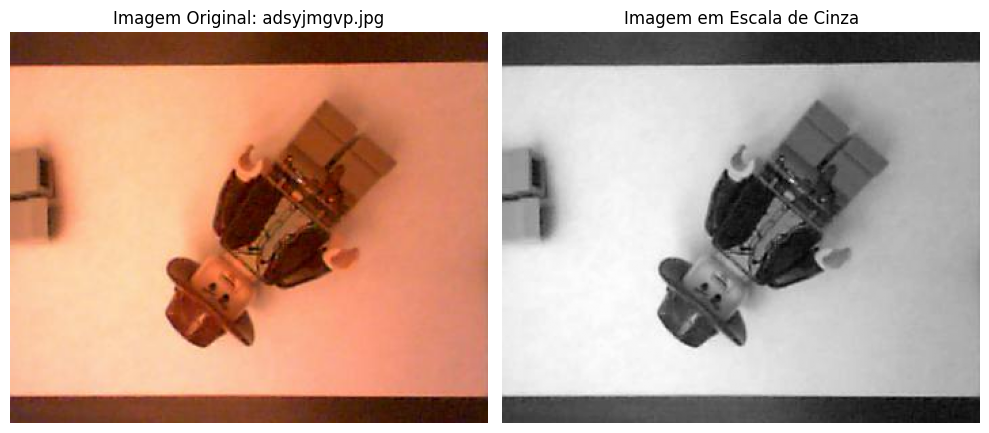

In [15]:
def carregar_imagem(caminho_imagem):
    """
    Carrega uma imagem e a converte para diferentes formatos necessários
    """
    # Carregar imagem
    img = cv2.imread(str(caminho_imagem))
    
    if img is None:
        print(f"Erro ao carregar a imagem: {caminho_imagem}")
        return None, None, None
    
    # Converter BGR para RGB (para matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Converter para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img_rgb, img_gray, img

# Testar com a primeira imagem
if image_files:
    test_image_path = image_files[0]
    img_rgb, img_gray, img_bgr = carregar_imagem(test_image_path)
    
    if img_rgb is not None:
        print(f"Imagem de teste carregada: {test_image_path.name}")
        print(f"Dimensões: {img_rgb.shape}")
        
        # Exibir a imagem de teste
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title(f'Imagem Original: {test_image_path.name}')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(img_gray, cmap='gray')
        plt.title('Imagem em Escala de Cinza')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
else:
    print("Nenhuma imagem encontrada para teste.")

## 3. Detectar Contornos nas Imagens

Utilizaremos diferentes técnicas do OpenCV para detectar contornos:
- **Canny Edge Detection**: Para detectar bordas
- **findContours**: Para encontrar contornos
- **Diferentes filtros**: Para melhorar a detecção

In [16]:
def detectar_contornos(img_gray, metodo='canny'):
    """
    Detecta contornos em uma imagem usando diferentes métodos
    """
    # Aplicar desfoque gaussiano para reduzir ruído
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    

    
    if metodo == 'adaptive':
        # Threshold adaptativo
        thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY, 11, 2)
        
        # Encontrar contornos
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        return thresh, contours

def desenhar_contornos(img_rgb, contours, min_area=100):
    """
    Desenha contornos filtrados por área mínima
    """
    img_contornos = img_rgb.copy()
    
    # Filtrar contornos por área
    contornos_filtrados = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            contornos_filtrados.append(contour)
    
    # Desenhar contornos
    cv2.drawContours(img_contornos, contornos_filtrados, -1, (0, 255, 0), 2)
    
    return img_contornos, len(contornos_filtrados)

# Testar detecção de contornos na imagem de exemplo
if img_gray is not None:
    print("Testando diferentes métodos de detecção de contornos...\n")
    
    # Testar método Canny
    edges_canny, contours_canny = detectar_contornos(img_gray, 'canny')
    img_contornos_canny, num_contornos_canny = desenhar_contornos(img_rgb, contours_canny)
    
    # Testar método Threshold
    thresh_binary, contours_thresh = detectar_contornos(img_gray, 'threshold')
    img_contornos_thresh, num_contornos_thresh = desenhar_contornos(img_rgb, contours_thresh)
    
    # Testar método Adaptive Threshold
    thresh_adaptive, contours_adaptive = detectar_contornos(img_gray, 'adaptive')
    img_contornos_adaptive, num_contornos_adaptive = desenhar_contornos(img_rgb, contours_adaptive)
    
    print(f"Método Canny: {num_contornos_canny} contornos detectados")
    print(f"Método Threshold: {num_contornos_thresh} contornos detectados")
    print(f"Método Adaptive: {num_contornos_adaptive} contornos detectados")

Testando diferentes métodos de detecção de contornos...



TypeError: cannot unpack non-iterable NoneType object

## 4. Exibir Resultados

Vamos visualizar os resultados dos diferentes métodos de detecção de contornos lado a lado.

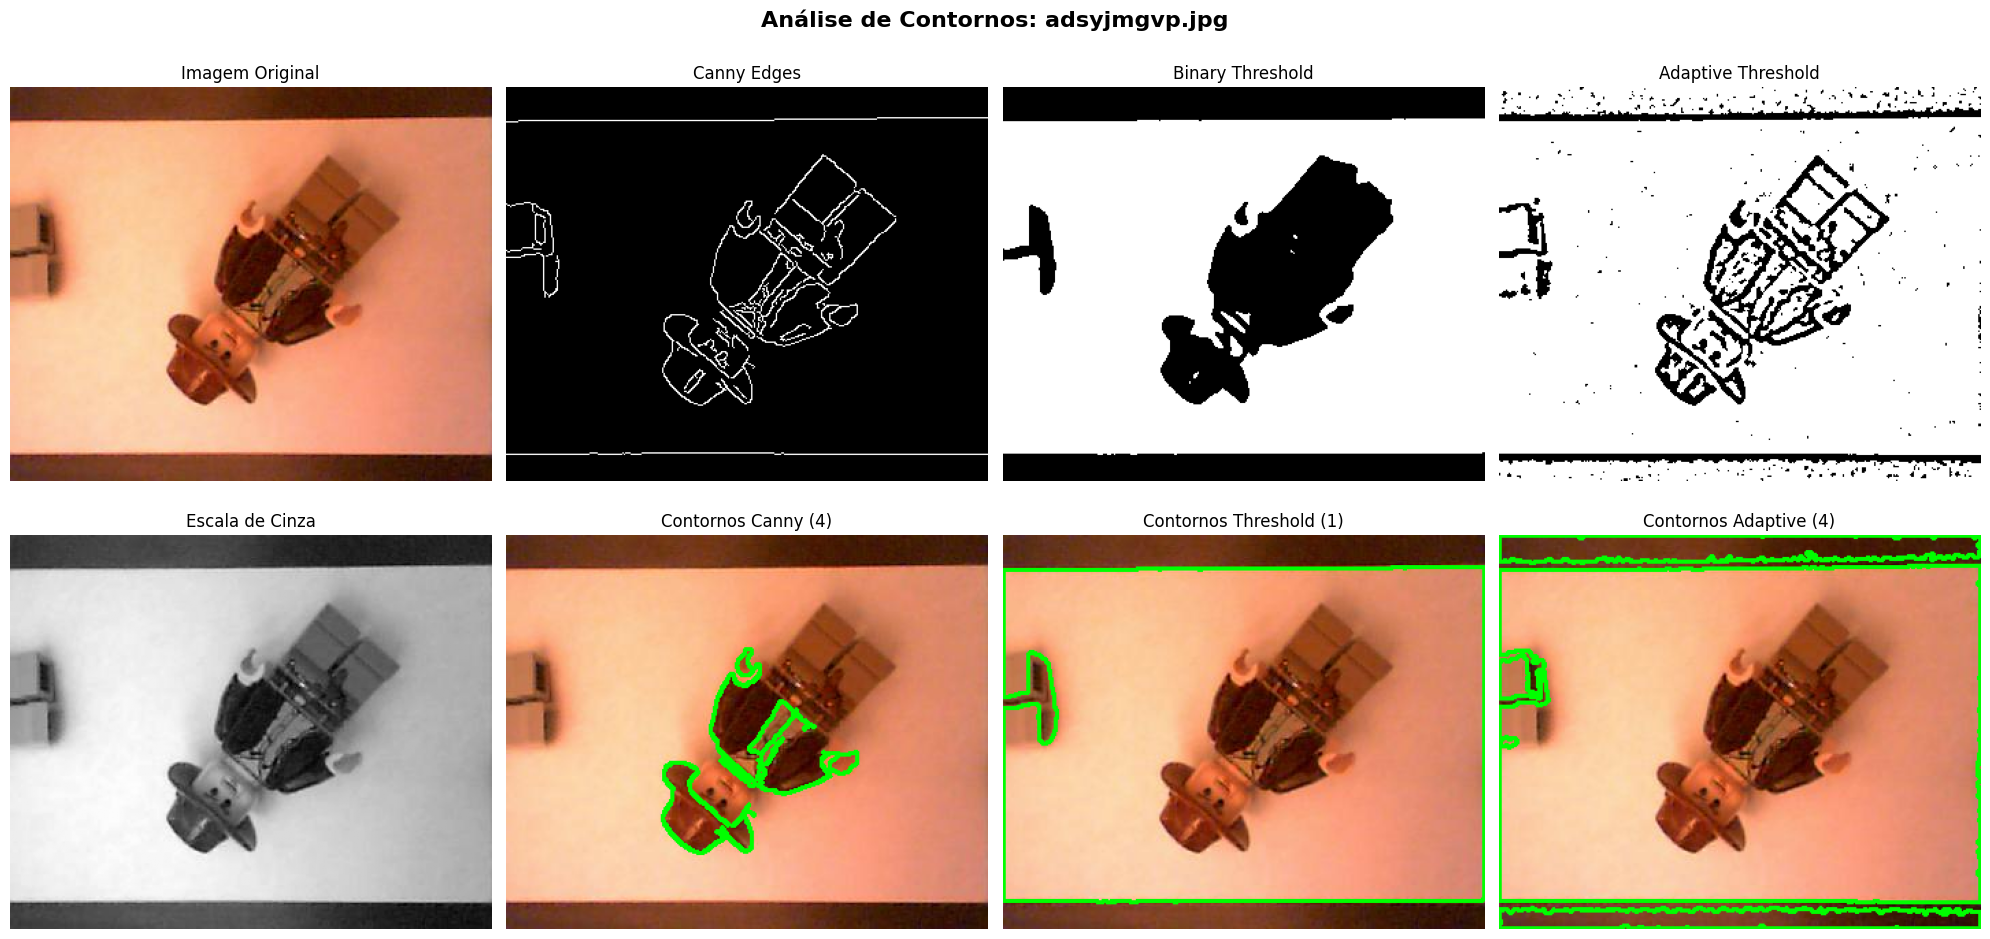


Resumo dos resultados para adsyjmgvp.jpg:
  Canny: 4 contornos
  Threshold: 1 contornos
  Adaptive: 4 contornos


In [ ]:
def exibir_comparacao_contornos(img_rgb, img_gray, nome_arquivo):
    """
    Exibe uma comparação completa dos métodos de detecção de contornos
    """
    thresh_adaptive, contours_adaptive = detectar_contornos(img_gray, 'adaptive')
    
    # Desenhar contornos
    img_contornos_canny, num_canny = desenhar_contornos(img_rgb, contours_canny)
    img_contornos_thresh, num_thresh = desenhar_contornos(img_rgb, contours_thresh)
    img_contornos_adaptive, num_adaptive = desenhar_contornos(img_rgb, contours_adaptive)
    
    # Criar subplot com todas as visualizações
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Análise de Contornos: {nome_arquivo}', fontsize=16, fontweight='bold')
    
    # Primeira linha: imagem original e processamento
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title('Imagem Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(edges_canny, cmap='gray')
    axes[0, 1].set_title('Canny Edges')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(thresh_binary, cmap='gray')
    axes[0, 2].set_title('Binary Threshold')
    axes[0, 2].axis('off')
    
    axes[0, 3].imshow(thresh_adaptive, cmap='gray')
    axes[0, 3].set_title('Adaptive Threshold')
    axes[0, 3].axis('off')
    
    
    plt.tight_layout()
    plt.show()
    
    return {
        'canny': num_canny,
        'threshold': num_thresh,
        'adaptive': num_adaptive
    }

# Exibir análise completa para a imagem de teste
if img_rgb is not None:
    resultados = exibir_comparacao_contornos(img_rgb, img_gray, test_image_path.name)
    print(f"\nResumo dos resultados para {test_image_path.name}:")
    for metodo, quantidade in resultados.items():
        print(f"  {metodo.capitalize()}: {quantidade} contornos")

Processando 5 imagens...

Processando 1/5: adsyjmgvp.jpg


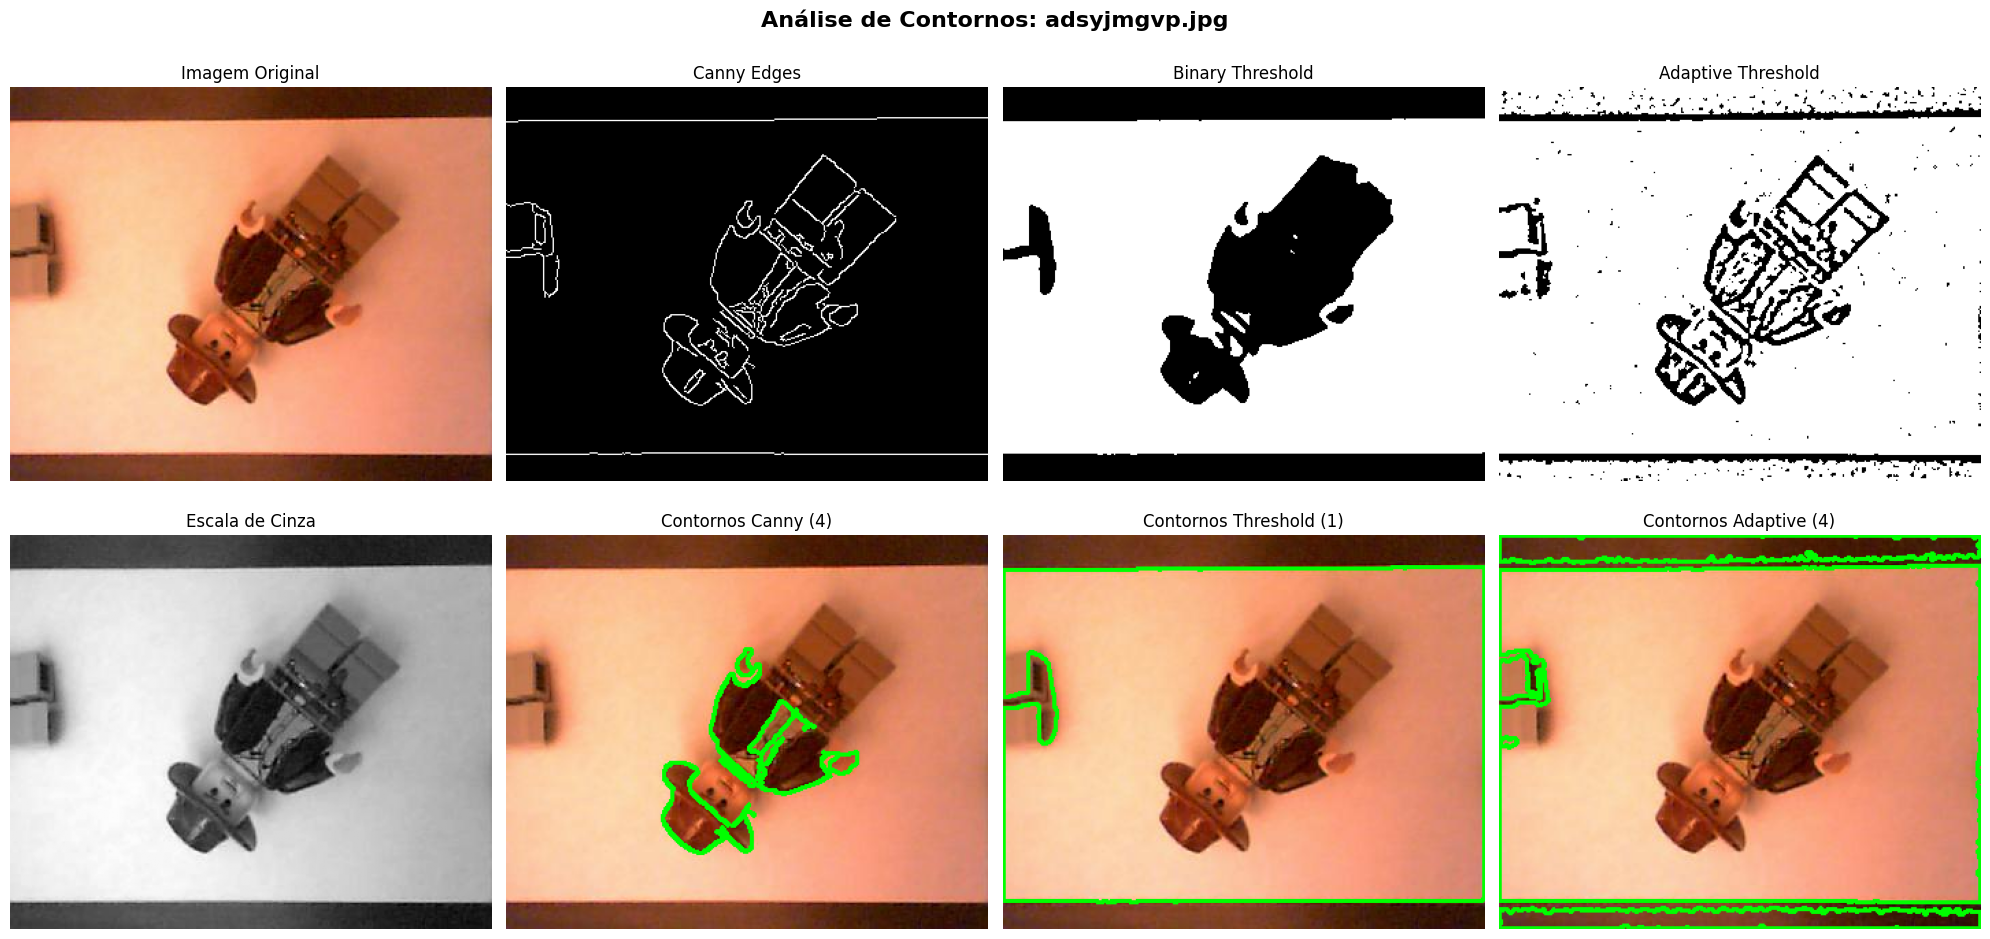

Concluído: adsyjmgvp.jpg

Processando 2/5: agmpdjsyv.jpg


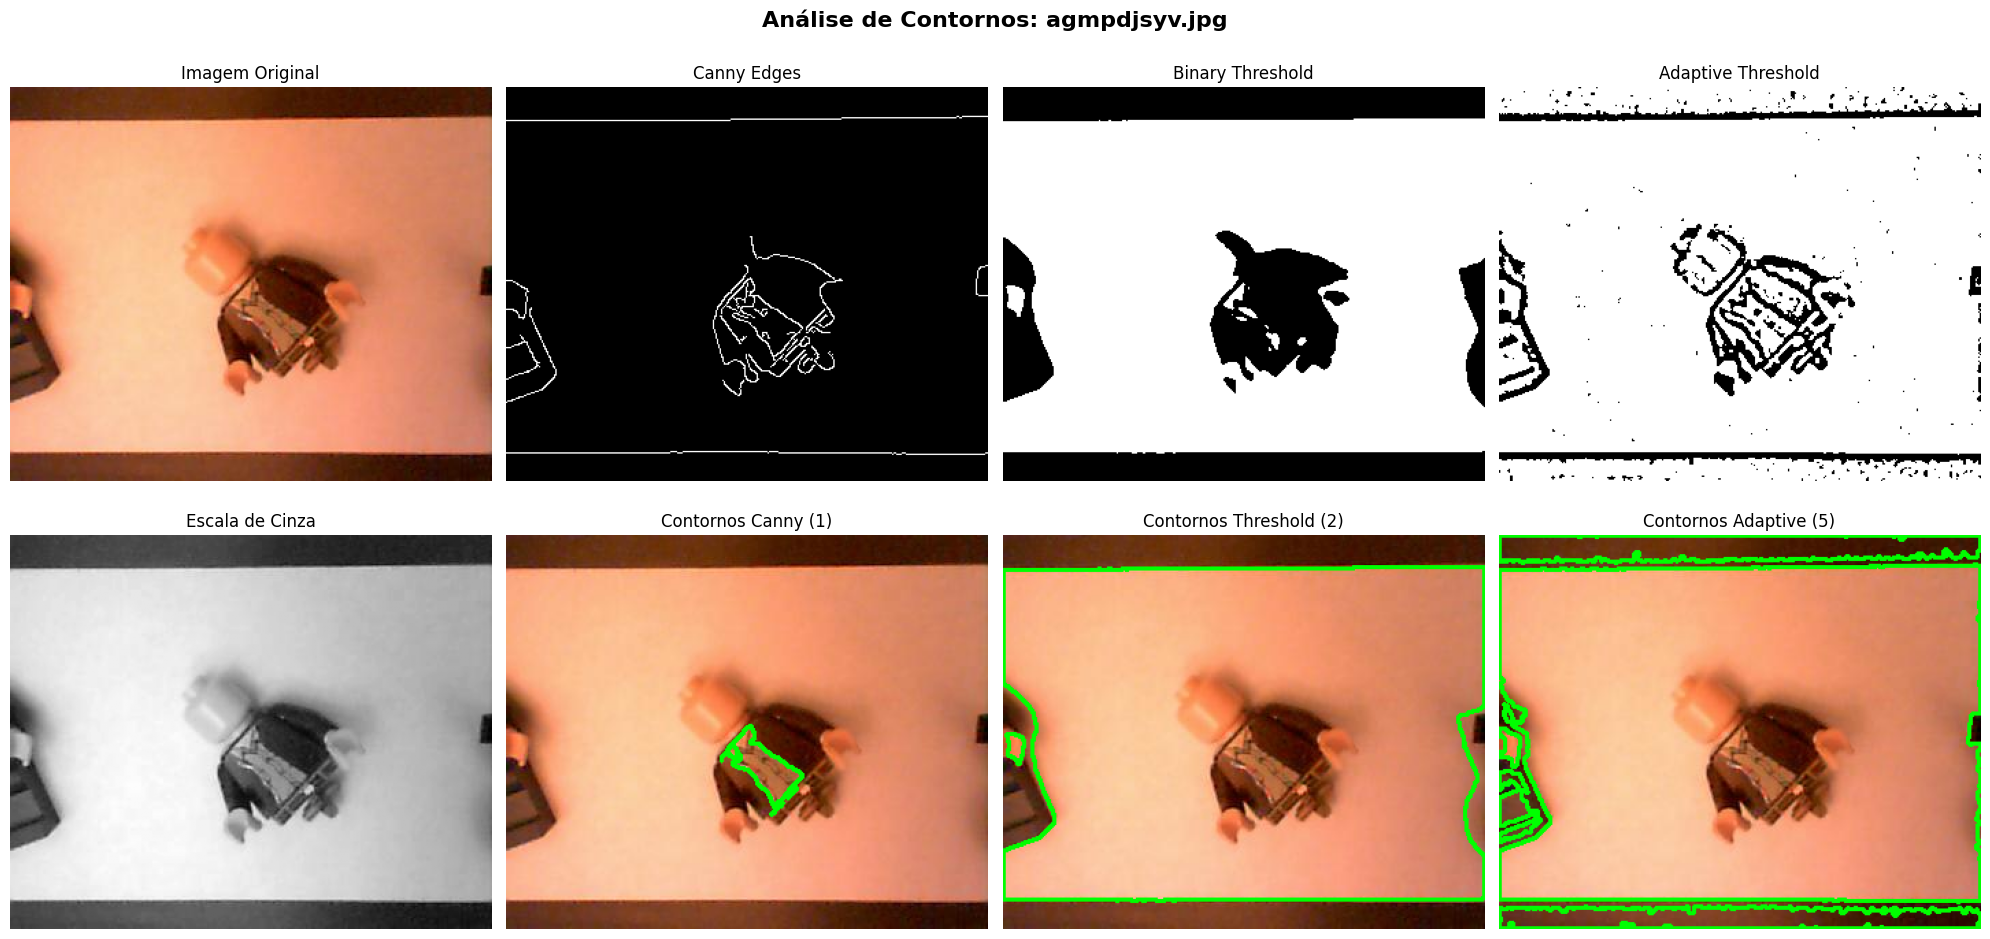

Concluído: agmpdjsyv.jpg

Processando 3/5: ajgyvdsmp.jpg


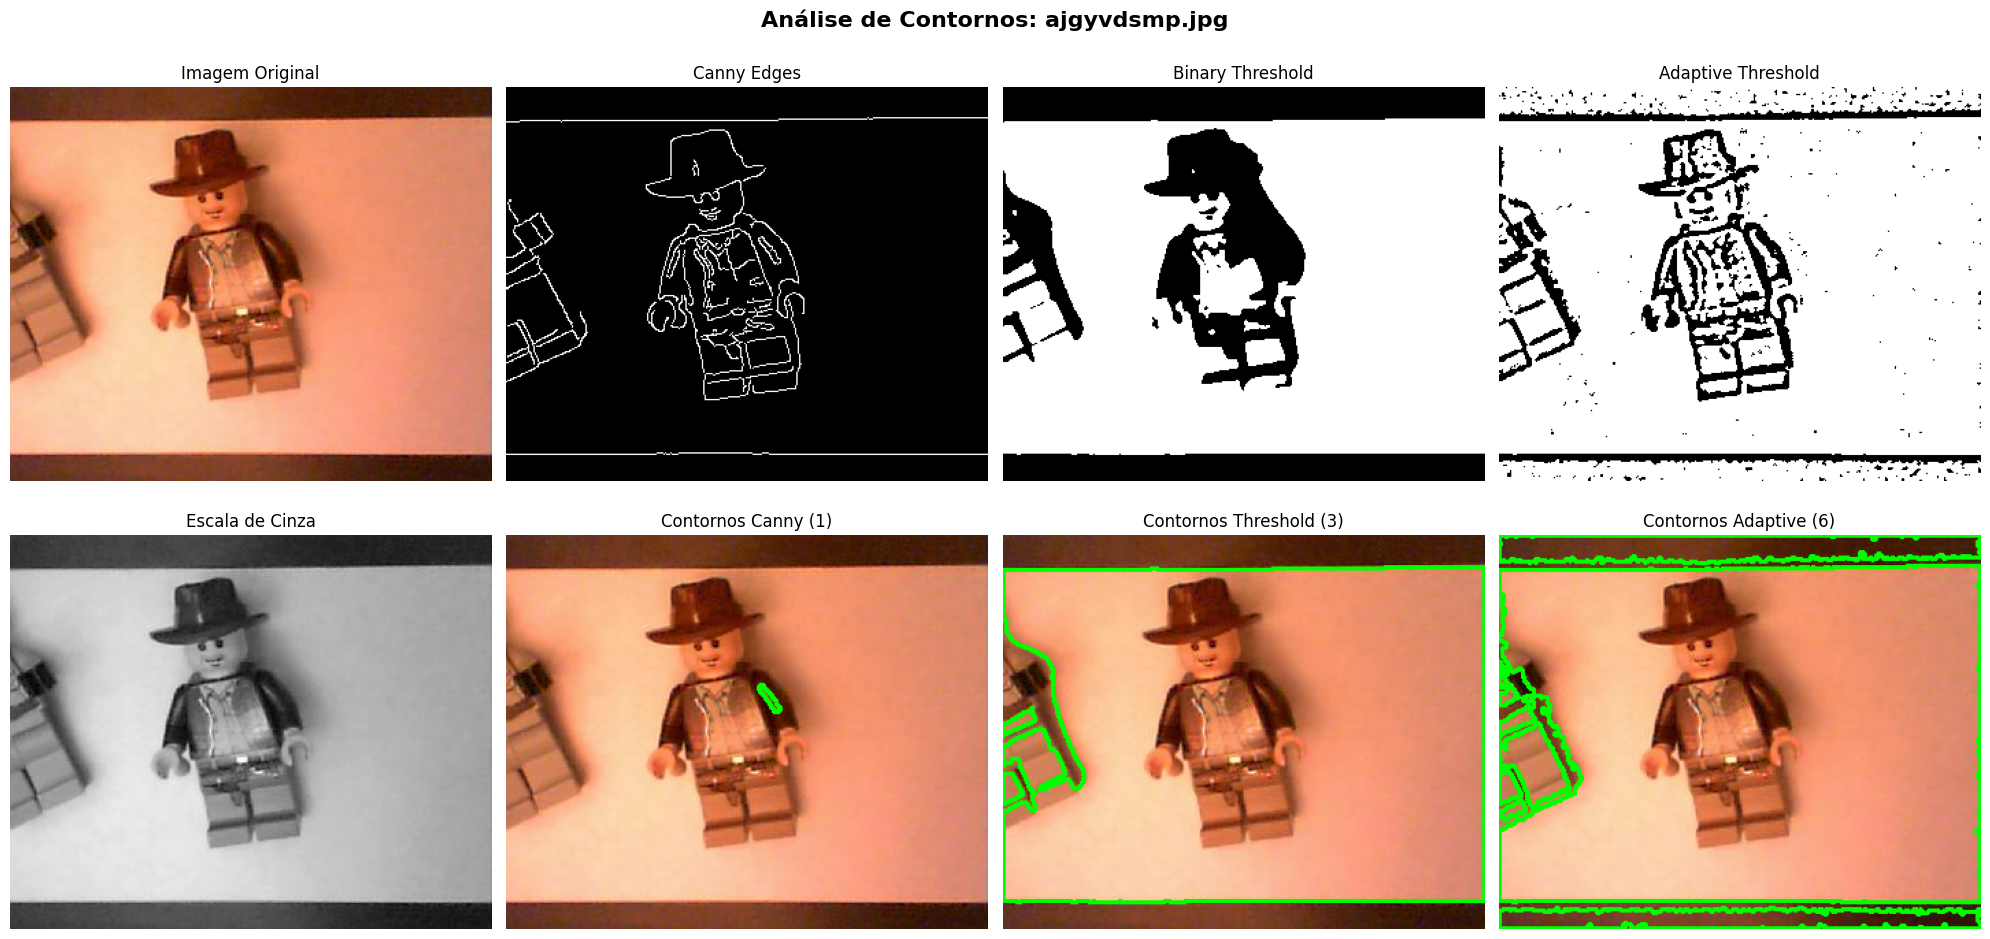

Concluído: ajgyvdsmp.jpg

Processando 4/5: ajsdmvypg.jpg


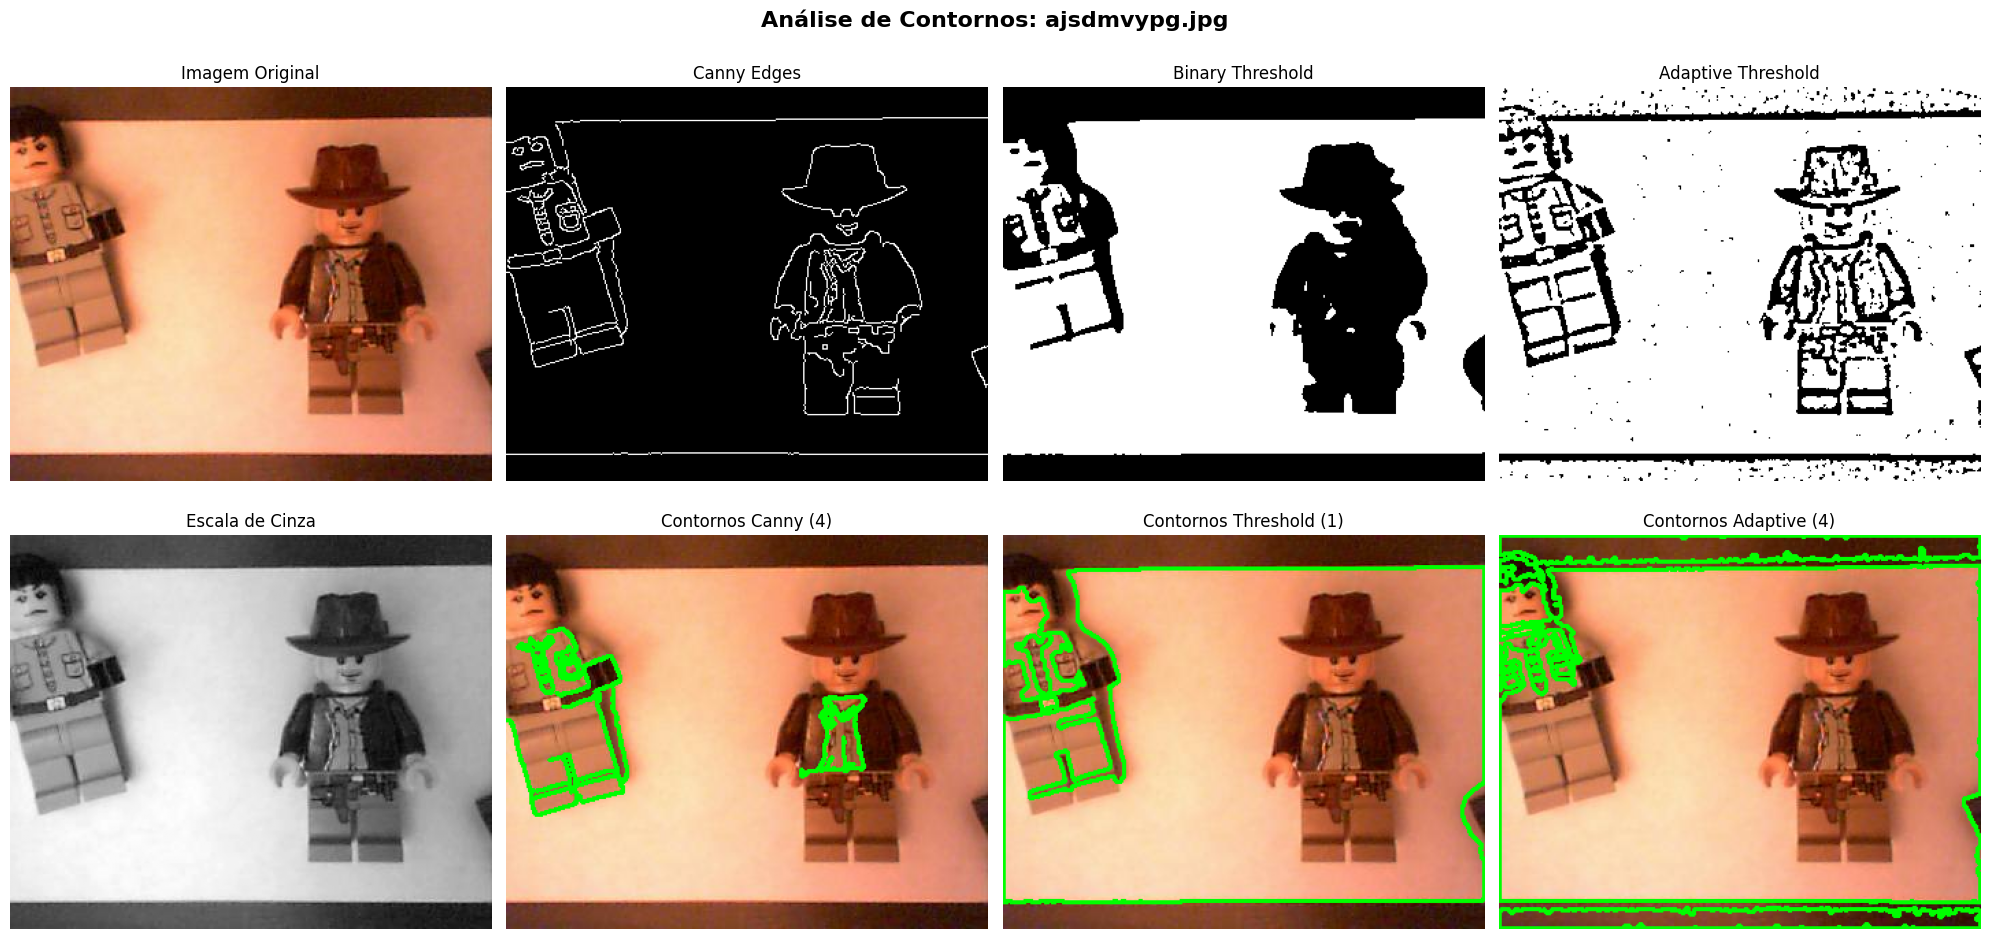

Concluído: ajsdmvypg.jpg

Processando 5/5: apmjvdgys.jpg


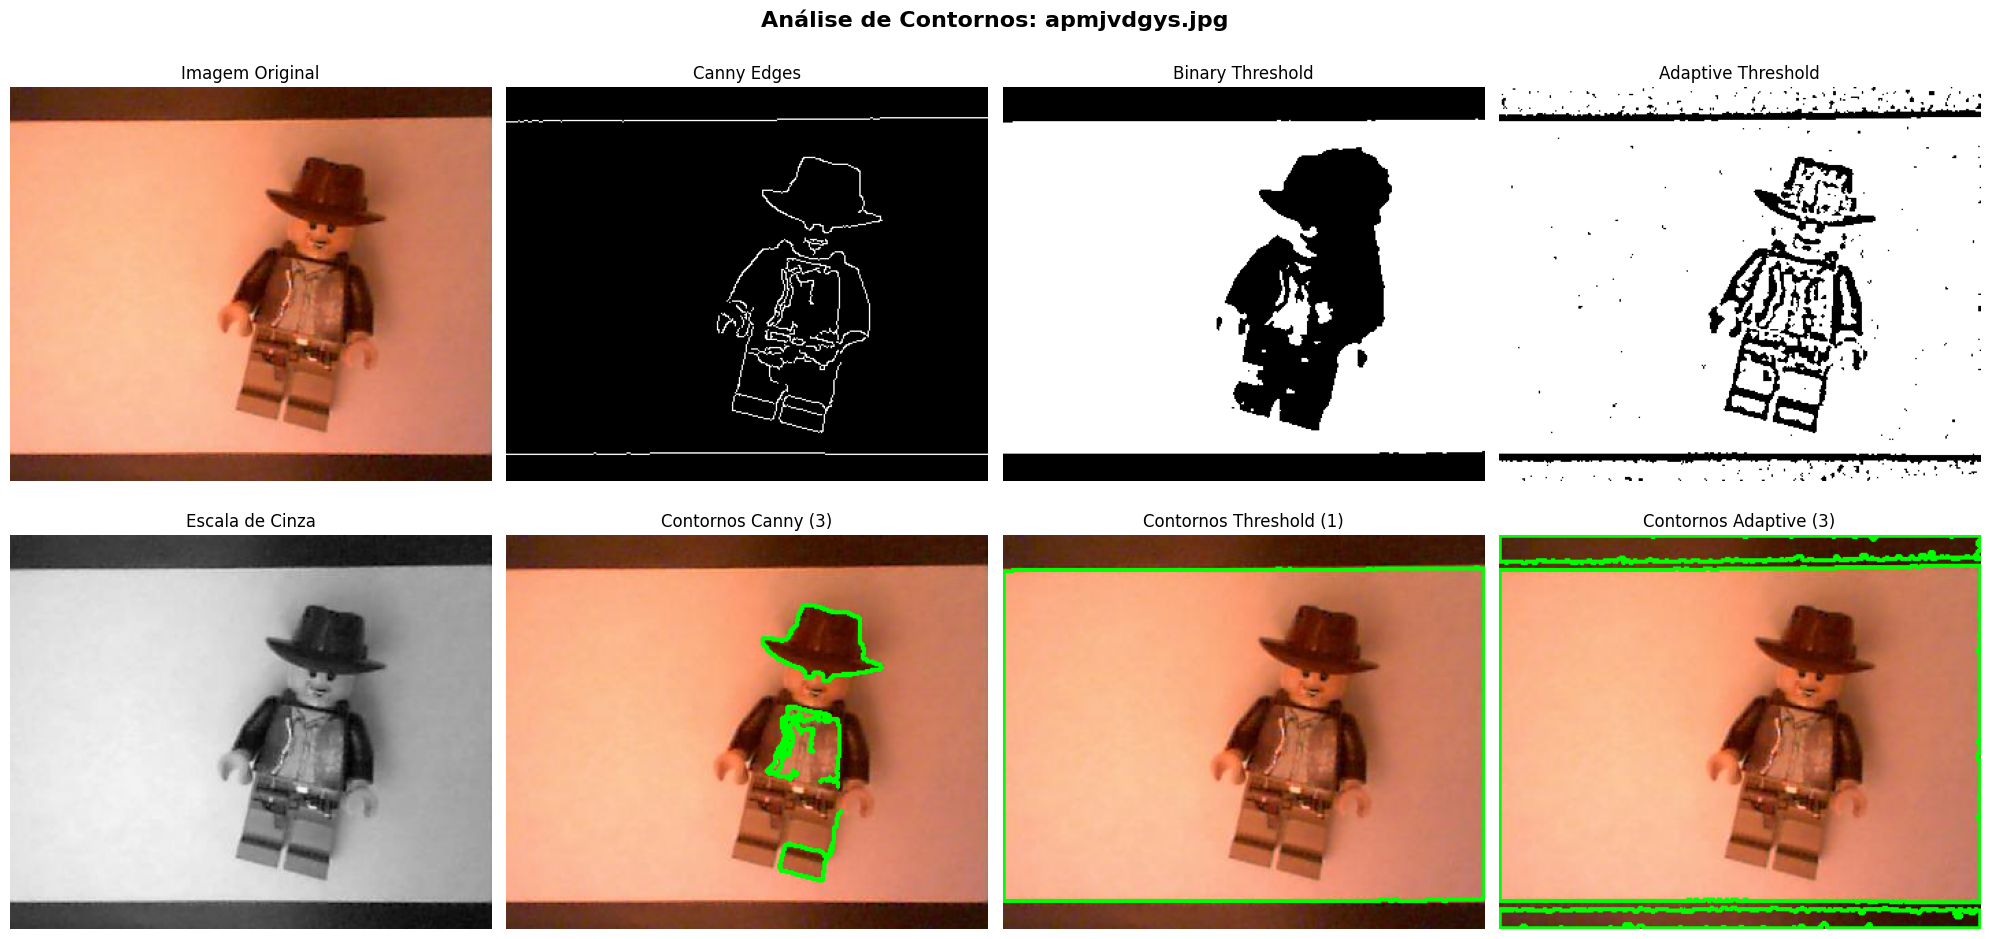

Concluído: apmjvdgys.jpg


=== RESUMO DOS RESULTADOS ===
 nome_arquivo  canny  threshold  adaptive
adsyjmgvp.jpg      4          1         4
agmpdjsyv.jpg      1          2         5
ajgyvdsmp.jpg      1          3         6
ajsdmvypg.jpg      4          1         4
apmjvdgys.jpg      3          1         3

=== ESTATÍSTICAS DOS MÉTODOS ===
Média Canny: 2.6
Média Threshold: 1.6
Média Adaptive: 4.4


In [ ]:
# Processar múltiplas imagens (primeiras 5 para exemplo)
num_imagens_processar = min(5, len(image_files))
resultados_todas_imagens = []

print(f"Processando {num_imagens_processar} imagens...\n")

for i, image_path in enumerate(image_files[:num_imagens_processar]):
    print(f"Processando {i+1}/{num_imagens_processar}: {image_path.name}")
    
    # Carregar imagem
    img_rgb, img_gray, img_bgr = carregar_imagem(image_path)
    
    if img_rgb is not None:
        # Analisar contornos
        resultados = exibir_comparacao_contornos(img_rgb, img_gray, image_path.name)
        
        # Adicionar aos resultados
        resultado_imagem = {
            'nome_arquivo': image_path.name,
            'canny': resultados['canny'],
            'threshold': resultados['threshold'],
            'adaptive': resultados['adaptive']
        }
        resultados_todas_imagens.append(resultado_imagem)
    
    print(f"Concluído: {image_path.name}\n")

# Criar DataFrame com os resultados
if resultados_todas_imagens:
    df_resultados = pd.DataFrame(resultados_todas_imagens)
    print("\n=== RESUMO DOS RESULTADOS ===")
    print(df_resultados.to_string(index=False))
    
    # Estatísticas dos métodos
    print("\n=== ESTATÍSTICAS DOS MÉTODOS ===")
    print(f"Média Canny: {df_resultados['canny'].mean():.1f}")
    print(f"Média Threshold: {df_resultados['threshold'].mean():.1f}")
    print(f"Média Adaptive: {df_resultados['adaptive'].mean():.1f}")
else:
    print("Nenhum resultado foi processado.")

C:\Users\Matheus\AppData\Local\Temp\ipykernel_6768\3822656903.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_boxplot, labels=metodos)


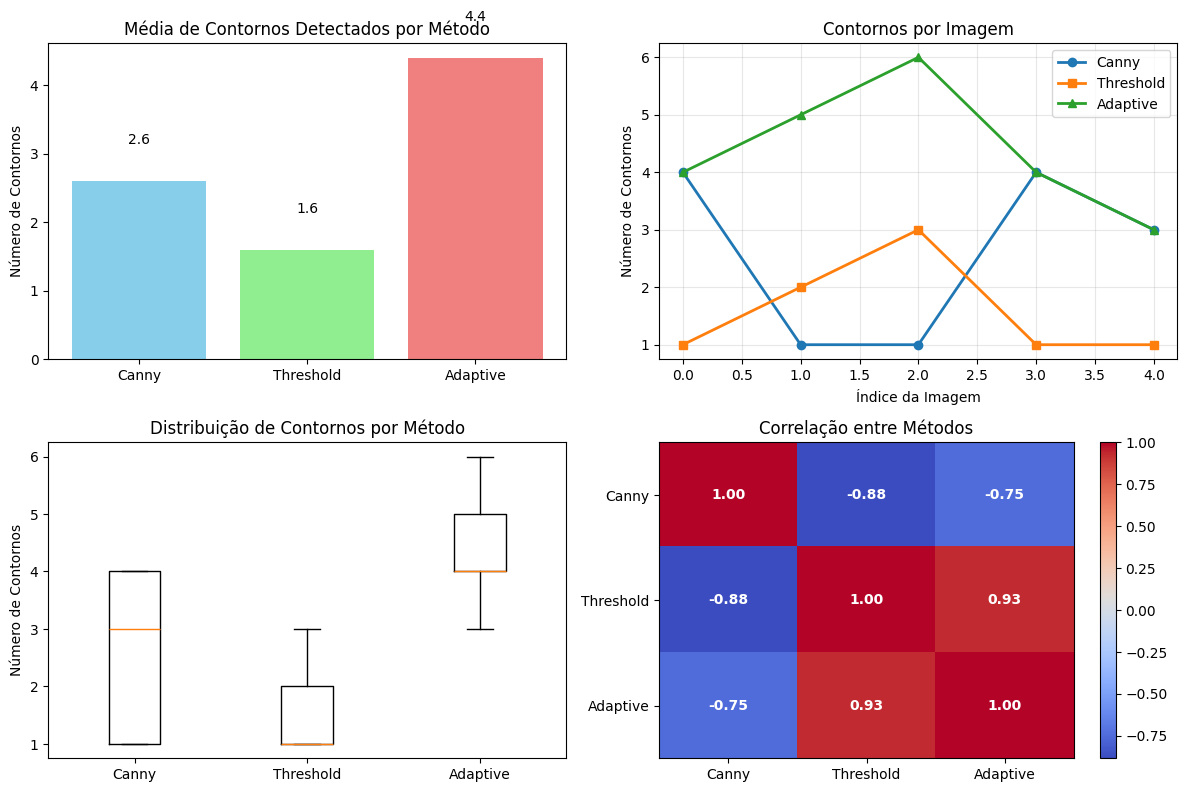

In [ ]:
# Visualizar performance dos diferentes métodos
if resultados_todas_imagens:
    plt.figure(figsize=(12, 8))
    
    # Gráfico de barras comparando métodos
    plt.subplot(2, 2, 1)
    metodos = ['Canny', 'Threshold', 'Adaptive']
    medias = [df_resultados['canny'].mean(), 
             df_resultados['threshold'].mean(), 
             df_resultados['adaptive'].mean()]
    
    bars = plt.bar(metodos, medias, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title('Média de Contornos Detectados por Método')
    plt.ylabel('Número de Contornos')
    
    # Adicionar valores nas barras
    for bar, valor in zip(bars, medias):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{valor:.1f}', ha='center', va='bottom')
    
    # Gráfico de linha mostrando variação por imagem
    plt.subplot(2, 2, 2)
    x = range(len(df_resultados))
    plt.plot(x, df_resultados['canny'], 'o-', label='Canny', linewidth=2)
    plt.plot(x, df_resultados['threshold'], 's-', label='Threshold', linewidth=2)
    plt.plot(x, df_resultados['adaptive'], '^-', label='Adaptive', linewidth=2)
    plt.title('Contornos por Imagem')
    plt.xlabel('Índice da Imagem')
    plt.ylabel('Número de Contornos')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Boxplot para mostrar distribuição
    plt.subplot(2, 2, 3)
    dados_boxplot = [df_resultados['canny'], df_resultados['threshold'], df_resultados['adaptive']]
    plt.boxplot(dados_boxplot, labels=metodos)
    plt.title('Distribuição de Contornos por Método')
    plt.ylabel('Número de Contornos')
    
    # Heatmap das correlações
    plt.subplot(2, 2, 4)
    correlacao = df_resultados[['canny', 'threshold', 'adaptive']].corr()
    im = plt.imshow(correlacao, cmap='coolwarm', aspect='auto')
    plt.colorbar(im)
    plt.title('Correlação entre Métodos')
    plt.xticks(range(3), metodos)
    plt.yticks(range(3), metodos)
    
    # Adicionar valores da correlação
    for i in range(3):
        for j in range(3):
            plt.text(j, i, f'{correlacao.iloc[i, j]:.2f}', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados suficientes para gerar visualizações.")

## 5. Conclusões e Recomendações

### Análise dos Métodos:

1. **Canny Edge Detection**:
   - Melhor para detectar bordas bem definidas
   - Sensível a parâmetros de threshold
   - Bom para objetos com contornos nítidos

2. **Binary Threshold**:
   - Simples e rápido
   - Pode ser afetado por variações de iluminação
   - Melhor para imagens com contraste alto

3. **Adaptive Threshold**:
   - Mais robusto a variações de iluminação
   - Melhor para imagens com iluminação desigual
   - Pode detectar mais detalhes internos

### Próximos Passos:
- Ajustar parâmetros específicos para cada método
- Combinar métodos para melhor detecção
- Implementar filtros de pós-processamento
- Análise de defeitos específicos baseada nos contornos detectados

In [ ]:
def analisar_imagem_especifica(nome_arquivo):
    """
    Permite analisar uma imagem específica pelo nome do arquivo
    """
    # Procurar a imagem
    imagem_encontrada = None
    for image_path in image_files:
        if image_path.name == nome_arquivo:
            imagem_encontrada = image_path
            break
    
    if imagem_encontrada is None:
        print(f"Imagem '{nome_arquivo}' não encontrada!")
        print("Imagens disponíveis:")
        for i, img_path in enumerate(image_files[:10]):
            print(f"  {i+1}. {img_path.name}")
        return
    
    # Carregar e analisar
    img_rgb, img_gray, img_bgr = carregar_imagem(imagem_encontrada)
    
    if img_rgb is not None:
        print(f"Analisando: {nome_arquivo}")
        resultados = exibir_comparacao_contornos(img_rgb, img_gray, nome_arquivo)
        
        print(f"\nResultados para {nome_arquivo}:")
        for metodo, quantidade in resultados.items():
            print(f"  {metodo.capitalize()}: {quantidade} contornos")
    else:
        print(f"Erro ao carregar a imagem: {nome_arquivo}")

# Exemplo de uso:
# analisar_imagem_especifica('nome_da_imagem.jpg')
print("\nPara analisar uma imagem específica, use:")
print("analisar_imagem_especifica('nome_do_arquivo.jpg')")
print("\nExemplo:")
if image_files:
    exemplo_nome = image_files[0].name
    print(f"analisar_imagem_especifica('{exemplo_nome}')")


Para analisar uma imagem específica, use:
analisar_imagem_especifica('nome_do_arquivo.jpg')

Exemplo:
analisar_imagem_especifica('adsyjmgvp.jpg')
